
## Introduction

In this analysis, we will be calculating the young stars who have the best potential. We will use current data to define the age of a young player, their efficiency based on others, and other criteria. Our goal is to identify the players with the highest potential and analyze their performance in various aspects.

Let's get started!


Source:   
This work was highly inspired by this work: https://www.kaggle.com/code/vivovinco/nba-rising-stars-2022-2023

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
RAW_DATA_DIR = Path('..') / "data" / "raw"
CURATED_DATA_DIR = Path('..') / "data" / "curated"

In [4]:
filename = list(RAW_DATA_DIR.glob('*.csv'))[0]
print(f"Runnung on file: {filename}")
players = pd.read_csv(filename,sep =";", encoding='Windows-1252')

Runnung on file: ../data/raw/2023-2024 NBA Player Stats - Regular.csv


In [5]:
players.sort_values(by=['Player'], ascending=True)

Rk           Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...    FT%  \
159  156       A.J. Green  SG   24  MIL  14   0   7.9  1.0   2.5  ...  1.000   
252  249      A.J. Lawson  SG   23  DAL   4   0   9.0  1.8   4.0  ...  0.500   
165  162       AJ Griffin  SF   20  ATL  11   0   9.2  0.9   3.0  ...  1.000   
155  152     Aaron Gordon  PF   28  DEN  19  19  33.1  5.3  10.9  ...  0.491   
193  190    Aaron Holiday  PG   27  HOU  17   1  18.5  2.9   5.7  ...  0.750   
..   ...              ...  ..  ...  ...  ..  ..   ...  ...   ...  ...    ...   
93    92     Zach Collins   C   26  SAS  21  20  28.8  5.1  10.7  ...  0.800   
251  248      Zach LaVine  SG   28  CHI  18  18  35.3  7.3  16.6  ...  0.866   
331  326       Zeke Nnaji  PF   23  DEN  19   0  10.5  1.3   2.7  ...  0.607   
494  483  Ziaire Williams  SF   22  MEM  19   8  20.2  2.8   7.2  ...  0.875   
495  484  Zion Williamson  PF   23  NOP  19  19  30.9  8.8  15.3  ...  0.642   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
159  0.1  0.5  0.6  0.6  0.0  0.0  0.0  0.6   2.9  
252  0.3  0.5  0.8  0.5  0.0  0.3  0.0  0.5   4.8  
165  0.2  0.7  0.9  0.3  0.1  0.0  0.4  0.5   2.7  
155  2.6  4.5  7.1  3.6  1.1  0.8  1.6  1.8  12.5  
193  0.2  1.8  2.0  2.1  0.5  0.1  0.5  1.9   7.4  
..   ...  ...  ...  ...  ...  ...  ...  ...   ...  
93   2.1  4.1  6.2  3.9  0.7  0.7  2.7  3.4  13.7  
251  0.3  4.6  4.9  3.4  0.9  0.2  2.0  2.1  21.0  
331  1.2  1.1  2.3  0.4  0.2  0.5  0.5  1.4   3.7  
494  0.6  3.4  4.1  1.2  0.5  0.3  1.2  1.8   8.0  
495  1.9  3.7  5.6  4.8  1.1  0.3  2.7  2.6  22.2  

[506 rows x 30 columns]

In [6]:
assert sum(players.isnull().sum()) == 0, "There are not null values in the dataset"


In [7]:
players["EFF"] = players.PTS + players.TRB + players.AST + players.STL + players.BLK - (players.FGA - players.FG) - (players.FTA - players.FT) - players.TOV

<Axes: xlabel='Pos', ylabel='EFF'>

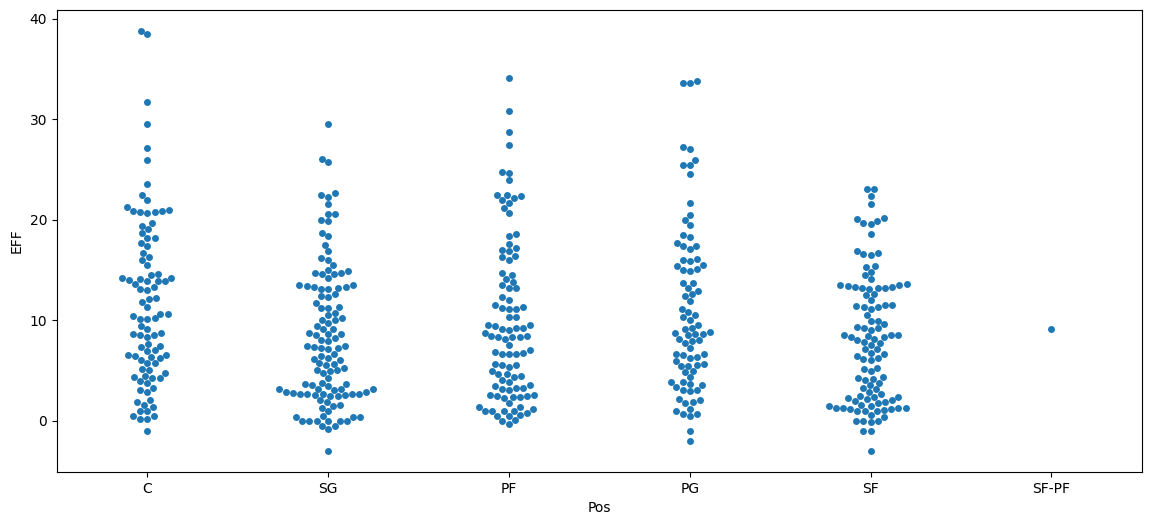

In [8]:
plt.figure(figsize=(14,6))
sns.swarmplot(
    x=players["Pos"],
    y=players["EFF"]
)

In [9]:
ages = players.Age.describe().round(decimals=1) # used to specify the first 25%, defining what is a young player
points = players.PTS.describe().round(decimals=1)

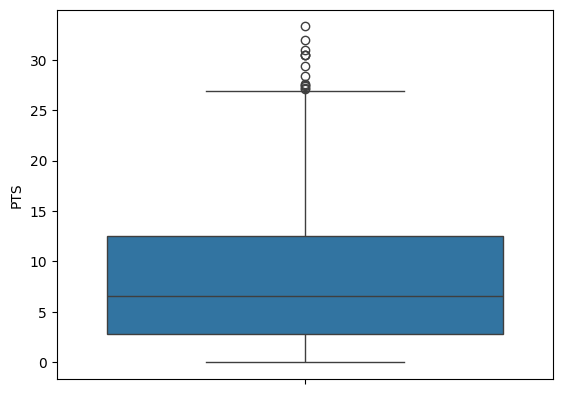

In [10]:
sns.boxplot(data=players, y="PTS");

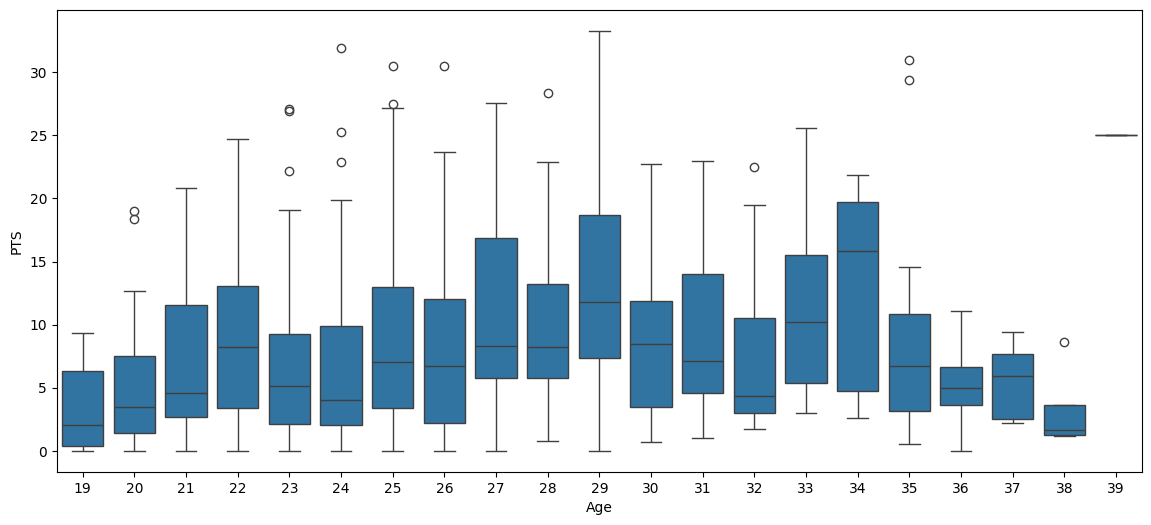

In [11]:
plt.figure(figsize=(14,6))
sns.boxplot(data=players, x="Age", y="PTS");

With the graph below, we can see that within <23y (what we have defined to be a young age), if we have more than 15 points we are special. Those data will then be used to filter the current base player and keep only special ones.

In [12]:
young_age = ages["25%"]
futur_super_star_def = f"(EFF >= 12) & (PTS >= 15) & (Age <= {young_age})"
players.query(futur_super_star_def).sort_values("EFF", ascending=False).sort_values(["Age", "EFF"], ascending=True)

Rk             Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  ORB  \
407  400     Shaedon Sharpe  SG   20  POR  21  20  37.0  6.4  15.0  ...  1.5   
476  465  Victor Wembanyama  PF   20  SAS  20  20  30.3  7.1  16.4  ...  2.4   
162  159        Jalen Green  SG   21  HOU  19  19  31.7  6.4  15.1  ...  0.4   
22    23     Paolo Banchero  PF   21  ORL  22  22  33.5  7.5  15.3  ...  1.3   
197  194      Chet Holmgren   C   21  OKC  21  21  30.0  6.0  11.7  ...  1.7   
402  395     Alperen Þengün   C   21  HOU  19  19  32.9  8.5  15.7  ...  2.5   
437  428         Cam Thomas  SG   22  BRK  12  10  31.5  8.9  19.8  ...  0.2   
102   99    Cade Cunningham  PG   22  DET  22  22  34.9  8.1  19.4  ...  0.5   
486  475     Jalen Williams  PF   22  OKC  18  18  33.1  6.7  13.0  ...  0.3   
463  452       Franz Wagner  SF   22  ORL  22  22  33.1  7.6  16.5  ...  1.2   
124  121    Anthony Edwards  SG   22  MIN  19  19  33.5  8.5  18.7  ...  0.7   
312  307        Evan Mobley  PF   22  CLE  21  21  33.6  6.8  11.8  ...  2.7   
20    21        LaMelo Ball  PG   22  CHO  15  15  33.4  8.8  19.9  ...  1.5   
27    28     Scottie Barnes  SG   22  TOR  22  22  34.8  7.4  15.8  ...  2.7   
319  314    Trey Murphy III  SF   23  NOP   3   0  24.7  6.0  13.0  ...  0.3   
28    29         RJ Barrett  SG   23  NYK  16  16  29.6  6.5  15.2  ...  0.7   
479  468         Coby White  PG   23  CHI  23  23  33.7  5.5  12.7  ...  0.3   
11    12       Cole Anthony  PG   23  ORL  22   0  26.0  5.1  11.3  ...  1.1   
458  447      Devin Vassell  SG   23  SAS  16  10  28.7  6.6  13.6  ...  0.4   
495  484    Zion Williamson  PF   23  NOP  19  19  30.9  8.8  15.3  ...  1.9   
286  281       Tyrese Maxey  PG   23  PHI  20  20  38.4  9.4  20.1  ...  0.6   
169  166  Tyrese Haliburton  PG   23  IND  18  18  34.4  9.4  17.9  ...  0.7   

     DRB   TRB   AST  STL  BLK  TOV   PF   PTS   EFF  
407  4.3   5.8   3.5  1.0  0.4  2.9  3.0  18.4  16.9  
476  7.8  10.2   2.6  1.3  2.7  3.3  2.5  19.0  22.4  
162  4.3   4.6   3.1  0.5  0.4  2.4  1.5  19.1  15.5  
22   5.4   6.7   4.5  1.0  0.6  3.0  2.4  20.7  20.7  
197  6.1   7.8   2.5  0.9  2.4  2.0  2.9  17.1  22.5  
402  6.5   9.1   5.7  0.9  0.8  2.5  3.2  20.8  25.9  
437  3.3   3.5   2.3  0.7  0.6  1.7  2.0  23.7  17.5  
102  3.3   3.8   7.3  1.0  0.2  4.3  2.7  22.0  18.3  
486  3.9   4.2   3.7  0.9  0.3  1.8  3.0  17.9  18.4  
463  4.4   5.6   3.7  1.1  0.4  1.7  2.0  20.7  20.2  
124  4.9   5.6   4.8  1.2  0.5  3.1  1.8  24.4  22.5  
312  7.8  10.5   2.9  0.8  1.7  2.3  2.9  16.0  23.9  
20   3.9   5.5   8.2  1.4  0.3  3.9  3.5  24.7  24.5  
27   6.5   9.2   5.6  1.7  1.3  2.5  2.0  19.8  25.7  
319  2.3   2.7   1.0  0.3  0.7  0.0  0.7  16.0  13.4  
28   3.2   3.9   2.6  0.5  0.2  1.9  1.4  19.1  15.0  
479  3.1   3.4   4.3  0.9  0.3  1.9  2.7  15.6  15.1  
11   3.5   4.6   3.6  0.7  0.5  2.0  3.0  15.4  15.9  
458  2.8   3.1   2.8  1.0  0.1  1.5  1.1  18.1  16.0  
495  3.7   5.6   4.8  1.1  0.3  2.7  2.6  22.2  22.2  
286  3.7   4.3   6.7  0.9  0.7  1.4  2.0  27.1  27.0  
169  3.4   4.2  12.1  1.0  0.7  2.2  1.1  26.9  33.6  

[22 rows x 31 columns]